In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
file_path='./CleanData/'

# IOE on Raw Data

## A

In [35]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-A-PK.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-A-CW.xlsx')

In [36]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,extra_sounds,parent_label,segment_label,noisy,Notes
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'extra_sounds', 'parent_label',
       'segment_label', 'noisy', 'Notes'],
      dtype='object')


In [37]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_in_parent,segment_label,parent_label,Noisy,extra sounds,Notes
0,00g8dfgpqpt61,00g8dfgpqpt61_processed_0,3,NaN,0.0,0.0,1.0,NaN,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_in_parent', 'segment_label', 'parent_label', 'Noisy',
       'extra sounds', 'Notes'],
      dtype='object')


In [38]:
# Correct val file column names
# Run for: A-CW
anno_val.columns=['parent_file','file_name', 'number_of_segments',
       'number_of_voices_in_parent', 'segment_label', 'parent_label', 'noisy',
       'extra sounds', 'Notes']
anno_val.head(1)

,parent_file,file_name,number_of_segments,number_of_voices_in_parent,segment_label,parent_label,noisy,extra sounds,Notes
0,00g8dfgpqpt61,00g8dfgpqpt61_processed_0,3,NaN,0.0,0.0,1.0,NaN,NaN


In [39]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     942 non-null    object 
 1   parent_file                   942 non-null    object 
 2   number_of_segments            942 non-null    float64
 3   number_of_voices_parent_file  942 non-null    float64
 4   extra_sounds                  410 non-null    object 
 5   parent_label                  942 non-null    float64
 6   segment_label                 942 non-null    float64
 7   noisy                         942 non-null    float64
 8   Notes                         15 non-null     object 
dtypes: float64(5), object(4)
memory usage: 66.4+ KB


In [40]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parent_file                 934 non-null    object 
 1   file_name                   934 non-null    object 
 2   number_of_segments          934 non-null    int64  
 3   number_of_voices_in_parent  0 non-null      float64
 4   segment_label               933 non-null    float64
 5   parent_label                933 non-null    float64
 6   noisy                       933 non-null    float64
 7   extra sounds                39 non-null     object 
 8   Notes                       0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 65.8+ KB


In [41]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [42]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file,extra_sounds,parent_label_train,segment_label_train,noisy_train,Notes_train,parent_file_val,number_of_segments_val,number_of_voices_in_parent,segment_label_val,parent_label_val,noisy_val,extra sounds,Notes_val
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
1,00g8dfgpqpt61_processed_1,00g8dfgpqpt62,3.0,9999.0,clapping,0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
2,00g8dfgpqpt61_processed_2,00g8dfgpqpt63,3.0,9999.0,NaN,0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
3,01avx2fm1t961_processed_0,01avx2fm1t961,5.0,9999.0,baby crying,3.0,3.0,1.0,NaN,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
4,01avx2fm1t961_processed_1,01avx2fm1t961,5.0,9999.0,baby crying,3.0,2.0,1.0,NaN,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,zvkhxd3vp3o51_processed_4,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN
938,zvkhxd3vp3o51_processed_5,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,zvkhxd3vp3o51,9.0,NaN,2.0,3.0,1.0,NaN,NaN
939,zvkhxd3vp3o51_processed_6,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN
940,zvkhxd3vp3o51_processed_7,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN


In [43]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged['segment_label_train'].isna() | df_merged['segment_label_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 941
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     920 non-null    object 
 1   parent_file_train             920 non-null    object 
 2   number_of_segments_train      920 non-null    float64
 3   number_of_voices_parent_file  920 non-null    float64
 4   extra_sounds                  398 non-null    object 
 5   parent_label_train            920 non-null    float64
 6   segment_label_train           920 non-null    float64
 7   noisy_train                   920 non-null    float64
 8   Notes_train                   12 non-null     object 
 9   parent_file_val               920 non-null    object 
 10  number_of_segments_val        920 non-null    float64
 11  number_of_voices_in_parent    0 non-null      float64
 12  segment_label_val             920 non-null    float64
 13  paren

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [149]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 513
Total: 920
Segment Unweighted IOE: 55.760869565217384
Segment Weighted IOE (Mean Absolute Error): 0.6032608695652174 

Parent: 
Matches: 568
Total: 920
Parent IOE: 61.73913043478261
Parent Weighted IOE (Mean Absolute Error): 0.4706521739130435 

Noisy: 
Matches: 743
Total: 920
Noisy IOE: 80.76086956521739


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykern

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-3.0,40
1,-2.0,37
2,-1.0,180
3,0.0,513
4,1.0,121
5,2.0,27
6,3.0,2


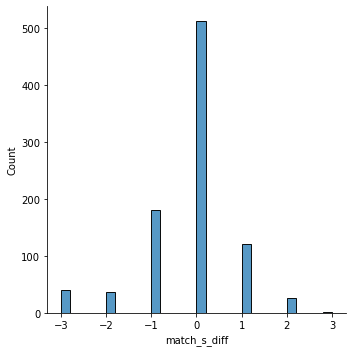

In [150]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-3.0,38
1,-2.0,5
2,-1.0,239
3,0.0,568
4,1.0,70


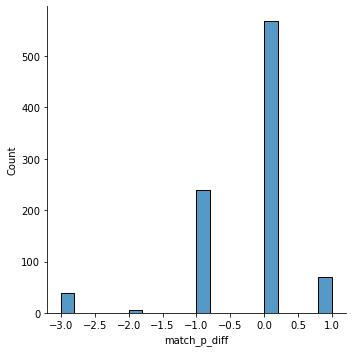

In [151]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-1.0,151
1,0.0,743
2,1.0,26


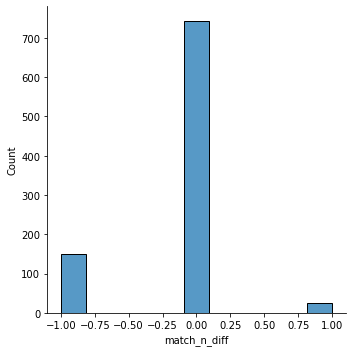

In [152]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [153]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 262
Total: 460
Segment IOE: 56.95652173913044 

Parent: 
Matches: 288
Total: 460
Parent IOE: 62.60869565217392 

Noisy: 
Matches: 377
Total: 460
Noisy IOE: 81.95652173913044


#### <b>Cohen's Kappa<b>

In [154]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.3430946340915709
Cohen k (Parent): 0.4919925769172244
Cohen k (Noisy): 0.39748693889028663


## E

In [155]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-VP.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-PK.xlsx')

In [156]:
display(anno_train.head(1))
print(anno_train.columns)

,File name,Parent file,Number of Segments,Number of voices parent,Segment label,extra sounds,Parent label,Notes,Noisy
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1


Index(['File name', 'Parent file', 'Number of Segments',
       'Number of voices parent', 'Segment label', 'extra sounds',
       'Parent label', 'Notes', 'Noisy'],
      dtype='object')


In [157]:
display(anno_val.head(1))
print(anno_val.columns)

,File Name,Parent file,Number of Segments,Noisy,Number of voices parent,extra sounds,Parent label,Segment label,Notes
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,1,crowd protesting,0,0,NaN


Index(['File Name', 'Parent file', 'Number of Segments', 'Noisy',
       'Number of voices parent', 'extra sounds', 'Parent label',
       'Segment label', 'Notes'],
      dtype='object')


In [158]:
# Correct val file column names
# Run for: E-VP
anno_train.columns=['File Name', 'Parent file', 'Number of Segments',
       'Number of voices parent', 'Segment label', 'extra sounds',
       'Parent label', 'Notes', 'Noisy']
anno_train.head(1)

,File Name,Parent file,Number of Segments,Number of voices parent,Segment label,extra sounds,Parent label,Notes,Noisy
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1


In [159]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   File Name                1058 non-null   object
 1   Parent file              1058 non-null   object
 2   Number of Segments       1058 non-null   int64 
 3   Number of voices parent  1058 non-null   int64 
 4   Segment label            1058 non-null   int64 
 5   extra sounds             839 non-null    object
 6   Parent label             1058 non-null   int64 
 7   Notes                    1057 non-null   object
 8   Noisy                    1058 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 74.5+ KB


In [160]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   File Name                1052 non-null   object
 1   Parent file              1052 non-null   object
 2   Number of Segments       1052 non-null   int64 
 3   Noisy                    1052 non-null   int64 
 4   Number of voices parent  1052 non-null   int64 
 5   extra sounds             570 non-null    object
 6   Parent label             1052 non-null   int64 
 7   Segment label            1052 non-null   int64 
 8   Notes                    8 non-null      object
dtypes: int64(5), object(4)
memory usage: 74.1+ KB


In [161]:
segment_label = 'Segment label'
parent_label = 'Parent label'
file_name= 'File Name'

anno_train[file_name] = anno_train[file_name].str.strip()
anno_val[file_name] = anno_val[file_name].str.strip()

In [162]:
# join 
df_merged = pd.merge(anno_train,anno_val,on=file_name,how='left',suffixes=('_train', '_val'))
df_merged

,File Name,Parent file_train,Number of Segments_train,Number of voices parent_train,Segment label_train,extra sounds_train,Parent label_train,Notes_train,Noisy_train,Parent file_val,Number of Segments_val,Noisy_val,Number of voices parent_val,extra sounds_val,Parent label_val,Segment label_val,Notes_val
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1,hpawo16k1s961,2.0,1.0,1.0,crowd protesting,0.0,0.0,NaN
1,hpawo16k1s961_processed_1,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1,hpawo16k1s961,2.0,1.0,1.0,crowd protesting,0.0,0.0,NaN
2,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3,1,0,Clicking,0,"The man uses suggestive language, but there is...",0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
3,hqztlcsmm1k51_processed_1,hqztlcsmm1k51,3,1,0,Clicking,0,There is no aggression heard in the audio file,0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
4,hqztlcsmm1k51_processed_2,hqztlcsmm1k51,3,1,0,NaN,0,There is no aggression heard in the audio file,0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,loch7b5a0cz51_processed_5,loch7b5a0cz51,19,2,2,"chatter, music",2,Someone is yelling in the background,1,loch7b5a0cz51,19.0,0.0,2.0,crowd,0.0,0.0,NaN
1054,loch7b5a0cz51_processed_6,loch7b5a0cz51,19,2,2,"chatter, music",2,Someone is yelling in the background,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN
1055,loch7b5a0cz51_processed_7,loch7b5a0cz51,19,2,0,"chatter, music",2,There is no aggression heard in the audio file,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN
1056,loch7b5a0cz51_processed_8,loch7b5a0cz51,19,2,1,"chatter, music",2,One man in the background raises his voice agg...,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN


In [163]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1057
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   File Name                      1050 non-null   object 
 1   Parent file_train              1050 non-null   object 
 2   Number of Segments_train       1050 non-null   int64  
 3   Number of voices parent_train  1050 non-null   int64  
 4   Segment label_train            1050 non-null   int64  
 5   extra sounds_train             838 non-null    object 
 6   Parent label_train             1050 non-null   int64  
 7   Notes_train                    1049 non-null   object 
 8   Noisy_train                    1050 non-null   int64  
 9   Parent file_val                1050 non-null   object 
 10  Number of Segments_val         1050 non-null   float64
 11  Noisy_val                      1050 non-null   float64
 12  Number of voices parent_val    1050 non-null   f

#### <b> Match or No Match & Weighted Match<b>
#### 100%

In [164]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['Noisy'+'_train'] == df_merged['Noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['Noisy'+'_train'] - df_merged['Noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)
#print('Noisy Weighted IOE (Mean Absolute Error):', df_merged['match_n_diff_abs'].mean(),'\n')

100%
Segment: 
Matches: 543
Total: 1050
Segment Unweighted IOE: 51.714285714285715
Segment Weighted IOE (Mean Absolute Error): 0.6495238095238095 

Parent: 
Matches: 295
Total: 1050
Parent IOE: 28.095238095238095
Parent Weighted IOE (Mean Absolute Error): 1.0104761904761905 

Noisy: 
Matches: 844
Total: 1050
Noisy IOE: 80.38095238095238


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/3516274235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/3516274235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipy

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-2.0,4
1,-1.0,74
2,0.0,543
3,1.0,282
4,2.0,123
5,3.0,24


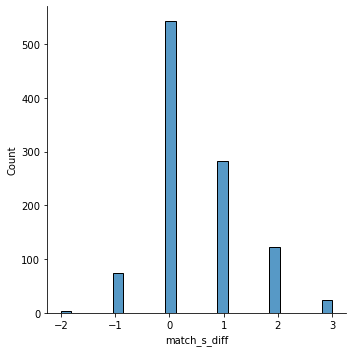

In [165]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,0.0,295
1,1.0,472
2,2.0,260
3,3.0,23


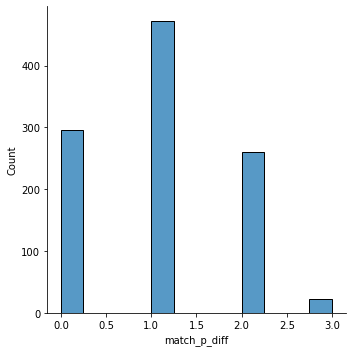

In [166]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-3.0,1
1,-1.0,54
2,0.0,844
3,1.0,151


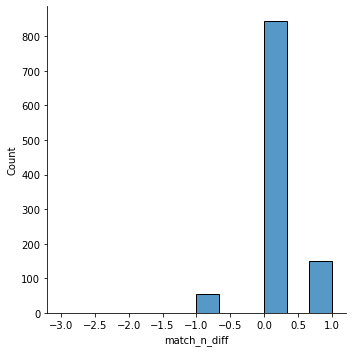

In [167]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [168]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 264
Total: 525
Segment IOE: 50.28571428571429 

Parent: 
Matches: 143
Total: 525
Parent IOE: 27.23809523809524 

Noisy: 
Matches: 424
Total: 525
Noisy IOE: 80.76190476190476


#### <b>Cohen's Kappa<b>

In [169]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
print('Cohen k (Noisy):',cohen_kappa_score(df_merged['Noisy'+'_train'], df_merged['Noisy'+'_val']))

Cohen k (Segment): 0.3170096479523761
Cohen k (Parent): 0.09224154218743741
Cohen k (Noisy): 0.3679984572500482


## H

#### train =  TL, val = KK_SA

In [170]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-TL_updated.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-KK_SA.xlsx')

In [171]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra sounds,Parent label,Segment label,Notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'Parent label',
       'Segment label', 'Notes'],
      dtype='object')


In [172]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra_sounds,parent_label,segment_label,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra_sounds', 'parent_label',
       'segment_label', 'notes'],
      dtype='object')


In [173]:
# Correct train file column names
# Run for H-TL
anno_train.columns=['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'parent_label',
       'segment_label', 'Notes']

In [174]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     650 non-null    object 
 1   parent_file                   650 non-null    object 
 2   number_of_segments            650 non-null    float64
 3   number_of_voices_parent_file  621 non-null    float64
 4   noisy                         0 non-null      float64
 5   extra sounds                  104 non-null    object 
 6   parent_label                  634 non-null    float64
 7   segment_label                 633 non-null    float64
 8   Notes                         25 non-null     object 
dtypes: float64(5), object(4)
memory usage: 45.8+ KB


In [175]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     436 non-null    object 
 1   parent_file                   436 non-null    object 
 2   number_of_segments            436 non-null    int64  
 3   number_of_voices_parent_file  436 non-null    int64  
 4   noisy                         435 non-null    float64
 5   extra_sounds                  67 non-null     object 
 6   parent_label                  435 non-null    float64
 7   segment_label                 436 non-null    int64  
 8   notes                         22 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 30.8+ KB


In [176]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [177]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file_train,noisy_train,extra sounds,parent_label_train,segment_label_train,Notes,parent_file_val,number_of_segments_val,number_of_voices_parent_file_val,noisy_val,extra_sounds,parent_label_val,segment_label_val,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,1.0,NaN
1,uortapdfw0x51_processed_1,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,1.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,0.0,woman2 is crying
2,uortapdfw0x51_processed_2,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,4.0,0.0,someone walking,3.0,0.0,no talking here
3,uortapdfw0x51_processed_3,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,0.0,no talking here
4,uortapdfw0x51_processed_4,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,zl1fow9ffo171_processed_12,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,zl1fow9ffo171_processed_13,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,zl1fow9ffo171_processed_14,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,zl1fow9ffo171_processed_15,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   file_name                           372 non-null    object 
 1   parent_file_train                   372 non-null    object 
 2   number_of_segments_train            372 non-null    float64
 3   number_of_voices_parent_file_train  359 non-null    float64
 4   noisy_train                         0 non-null      float64
 5   extra sounds                        49 non-null     object 
 6   parent_label_train                  372 non-null    float64
 7   segment_label_train                 372 non-null    float64
 8   Notes                               8 non-null      object 
 9   parent_file_val                     372 non-null    object 
 10  number_of_segments_val              372 non-null    float64
 11  number_of_voices_parent_file_val    372 non-n

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [179]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 132
Total: 372
Segment Unweighted IOE: 35.483870967741936
Segment Weighted IOE (Mean Absolute Error): 0.8870967741935484 

Parent: 
Matches: 132
Total: 372
Parent IOE: 35.483870967741936
Parent Weighted IOE (Mean Absolute Error): 0.8091397849462365 

Noisy: 
Matches: 0
Total: 372
Noisy IOE: 0.0


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykern

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-3.0,7
1,-2.0,18
2,-1.0,40
3,0.0,132
4,1.0,118
5,2.0,56
6,3.0,1


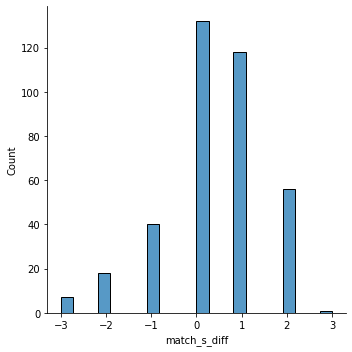

In [180]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-3.0,4
1,-2.0,13
2,-1.0,47
3,0.0,132
4,1.0,136
5,2.0,40


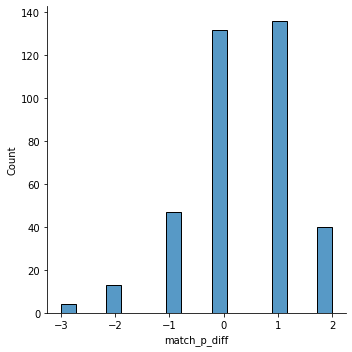

In [181]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n


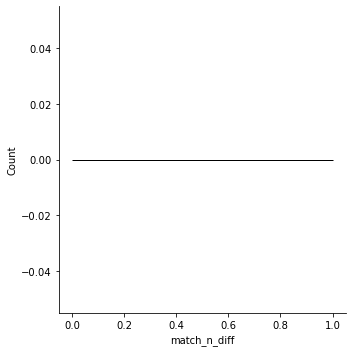

In [182]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [183]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 65
Total: 186
Segment IOE: 34.946236559139784 

Parent: 
Matches: 64
Total: 186
Parent IOE: 34.40860215053764 

Noisy: 
Matches: 0
Total: 186
Noisy IOE: 0.0


#### <b>Cohen's Kappa<b>

In [184]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['Noisy'+'_train'], df_merged['Noisy'+'_val']))

Cohen k (Segment): 0.12199439445345928
Cohen k (Parent): 0.13087496592811798


#### train =  KK, val = SA_tie_breaker

In [185]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-KK_SA.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-SA_tie_breaker.xlsx')

In [186]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra_sounds,parent_label,segment_label,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra_sounds', 'parent_label',
       'segment_label', 'notes'],
      dtype='object')


In [187]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra_sounds,parent_label,segment_label,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,5,0,door slam,1,0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra_sounds', 'parent_label',
       'segment_label', 'notes'],
      dtype='object')


In [188]:
# Correct train file column names
# Run for H-TL
# anno_train.columns=['file_name', 'parent_file', 'number_of_segments',
#        'number_of_voices_parent_file', 'noisy', 'extra sounds', 'parent_label',
#        'segment_label', 'Notes']

In [189]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     436 non-null    object 
 1   parent_file                   436 non-null    object 
 2   number_of_segments            436 non-null    int64  
 3   number_of_voices_parent_file  436 non-null    int64  
 4   noisy                         435 non-null    float64
 5   extra_sounds                  67 non-null     object 
 6   parent_label                  435 non-null    float64
 7   segment_label                 436 non-null    int64  
 8   notes                         22 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 30.8+ KB


In [190]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   file_name                     100 non-null    object
 1   parent_file                   100 non-null    object
 2   number_of_segments            100 non-null    int64 
 3   number_of_voices_parent_file  100 non-null    int64 
 4   noisy                         100 non-null    int64 
 5   extra_sounds                  22 non-null     object
 6   parent_label                  100 non-null    int64 
 7   segment_label                 100 non-null    int64 
 8   notes                         5 non-null      object
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [191]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [192]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file_train,noisy_train,extra_sounds_train,parent_label_train,segment_label_train,notes_train,parent_file_val,number_of_segments_val,number_of_voices_parent_file_val,noisy_val,extra_sounds_val,parent_label_val,segment_label_val,notes_val
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN,uortapdfw0x51,8.0,5.0,0.0,door slam,1.0,0.0,NaN
1,uortapdfw0x51_processed_1,uortapdfw0x51,8,4,0.0,NaN,3.0,0,woman2 is crying,uortapdfw0x51,8.0,5.0,0.0,screechy noise,1.0,1.0,NaN
2,uortapdfw0x51_processed_2,uortapdfw0x51,8,4,0.0,someone walking,3.0,0,no talking here,uortapdfw0x51,8.0,5.0,0.0,no voice present,1.0,0.0,empty
3,uortapdfw0x51_processed_3,uortapdfw0x51,8,4,0.0,NaN,3.0,0,no talking here,uortapdfw0x51,8.0,5.0,0.0,NaN,1.0,0.0,NaN
4,uortapdfw0x51_processed_4,uortapdfw0x51,8,4,0.0,NaN,3.0,3,NaN,uortapdfw0x51,8.0,5.0,0.0,shout,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,xdz15thrnem51_processed_9,xdz15thrnem51,14,7,0.0,NaN,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,xdz15thrnem51_processed_10,xdz15thrnem51,14,7,0.0,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,xdz15thrnem51_processed_11,xdz15thrnem51,14,7,0.0,cops,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,xdz15thrnem51_processed_12,xdz15thrnem51,14,7,0.0,cops,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   file_name                           100 non-null    object 
 1   parent_file_train                   100 non-null    object 
 2   number_of_segments_train            100 non-null    int64  
 3   number_of_voices_parent_file_train  100 non-null    int64  
 4   noisy_train                         100 non-null    float64
 5   extra_sounds_train                  7 non-null      object 
 6   parent_label_train                  100 non-null    float64
 7   segment_label_train                 100 non-null    int64  
 8   notes_train                         5 non-null      object 
 9   parent_file_val                     100 non-null    object 
 10  number_of_segments_val              100 non-null    float64
 11  number_of_voices_parent_file_val    100 non-nu

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [194]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 28
Total: 100
Segment Unweighted IOE: 28.000000000000004
Segment Weighted IOE (Mean Absolute Error): 0.99 

Parent: 
Matches: 10
Total: 100
Parent IOE: 10.0
Parent Weighted IOE (Mean Absolute Error): 1.04 

Noisy: 
Matches: 97
Total: 100
Noisy IOE: 97.0


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykern

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,4
1,0.0,28
2,1.0,43
3,2.0,23
4,3.0,2


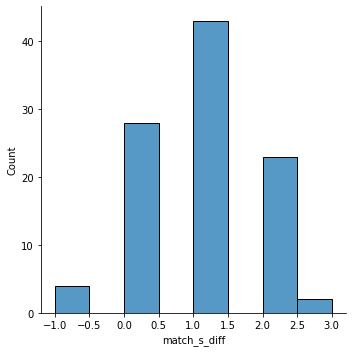

In [195]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,4
1,0.0,10
2,1.0,74
3,2.0,10
4,3.0,2


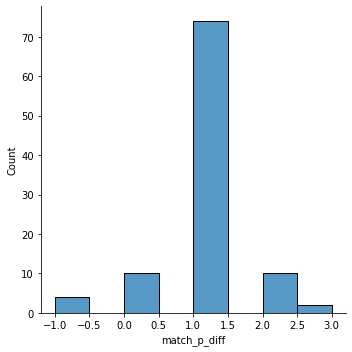

In [196]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-1.0,3
1,0.0,97


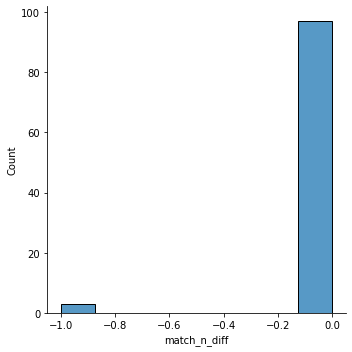

In [197]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [198]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 13
Total: 50
Segment IOE: 26.0 

Parent: 
Matches: 6
Total: 50
Parent IOE: 12.0 

Noisy: 
Matches: 48
Total: 50
Noisy IOE: 96.0


#### <b>Cohen's Kappa<b>

In [199]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.04912836767036444
Cohen k (Parent): -0.16039195461578126


#### train =  TL, val = SA_tie_breaker

In [230]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-TL_updated.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-SA_tie_breaker.xlsx')

In [231]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra sounds,Parent label,Segment label,Notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'Parent label',
       'Segment label', 'Notes'],
      dtype='object')


In [232]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra_sounds,parent_label,segment_label,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,5,0,door slam,1,0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra_sounds', 'parent_label',
       'segment_label', 'notes'],
      dtype='object')


In [233]:
# Correct train file column names
# Run for H-TL
anno_train.columns=['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'parent_label',
       'segment_label', 'Notes']

In [234]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     650 non-null    object 
 1   parent_file                   650 non-null    object 
 2   number_of_segments            650 non-null    float64
 3   number_of_voices_parent_file  621 non-null    float64
 4   noisy                         0 non-null      float64
 5   extra sounds                  104 non-null    object 
 6   parent_label                  634 non-null    float64
 7   segment_label                 633 non-null    float64
 8   Notes                         25 non-null     object 
dtypes: float64(5), object(4)
memory usage: 45.8+ KB


In [235]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   file_name                     100 non-null    object
 1   parent_file                   100 non-null    object
 2   number_of_segments            100 non-null    int64 
 3   number_of_voices_parent_file  100 non-null    int64 
 4   noisy                         100 non-null    int64 
 5   extra_sounds                  22 non-null     object
 6   parent_label                  100 non-null    int64 
 7   segment_label                 100 non-null    int64 
 8   notes                         5 non-null      object
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [236]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [237]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file_train,noisy_train,extra sounds,parent_label_train,segment_label_train,Notes,parent_file_val,number_of_segments_val,number_of_voices_parent_file_val,noisy_val,extra_sounds,parent_label_val,segment_label_val,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,5.0,0.0,door slam,1.0,0.0,NaN
1,uortapdfw0x51_processed_1,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,1.0,NaN,uortapdfw0x51,8.0,5.0,0.0,screechy noise,1.0,1.0,NaN
2,uortapdfw0x51_processed_2,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,5.0,0.0,no voice present,1.0,0.0,empty
3,uortapdfw0x51_processed_3,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,5.0,0.0,NaN,1.0,0.0,NaN
4,uortapdfw0x51_processed_4,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,5.0,0.0,shout,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,zl1fow9ffo171_processed_12,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,zl1fow9ffo171_processed_13,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,zl1fow9ffo171_processed_14,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,zl1fow9ffo171_processed_15,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   file_name                           100 non-null    object 
 1   parent_file_train                   100 non-null    object 
 2   number_of_segments_train            100 non-null    float64
 3   number_of_voices_parent_file_train  100 non-null    float64
 4   noisy_train                         0 non-null      float64
 5   extra sounds                        5 non-null      object 
 6   parent_label_train                  100 non-null    float64
 7   segment_label_train                 100 non-null    float64
 8   Notes                               0 non-null      object 
 9   parent_file_val                     100 non-null    object 
 10  number_of_segments_val              100 non-null    float64
 11  number_of_voices_parent_file_val    100 non-nu

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [239]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 19
Total: 100
Segment Unweighted IOE: 19.0
Segment Weighted IOE (Mean Absolute Error): 1.14 

Parent: 
Matches: 38
Total: 100
Parent IOE: 38.0
Parent Weighted IOE (Mean Absolute Error): 0.79 

Noisy: 
Matches: 0
Total: 100
Noisy IOE: 0.0


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/17326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykern

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,2
1,0.0,19
2,1.0,47
3,2.0,31
4,3.0,1


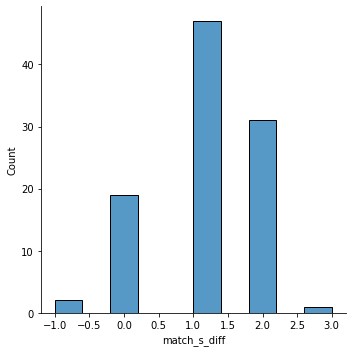

In [240]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,0.0,38
1,1.0,47
2,2.0,13
3,3.0,2


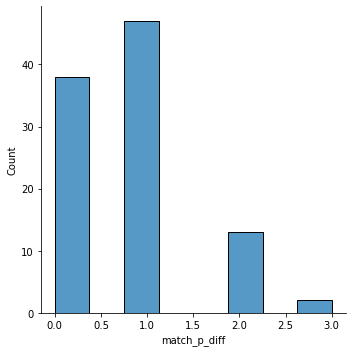

In [241]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n


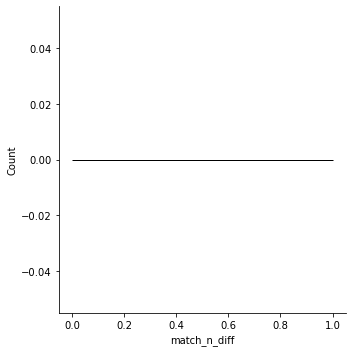

In [242]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [243]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 14
Total: 50
Segment IOE: 28.000000000000004 

Parent: 
Matches: 22
Total: 50
Parent IOE: 44.0 

Noisy: 
Matches: 0
Total: 50
Noisy IOE: 0.0


#### <b>Cohen's Kappa<b>

In [244]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.03398926654740597
Cohen k (Parent): 0.14846861694822122


## F

In [215]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-F-CW.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-F-SA.xlsx')

In [216]:
display(anno_train.head(1))
print(anno_train.columns)

,parent_file,file_name,segment_label,parent_label,Noisy,extra sounds,Notes
0,lpg39tdh1bv51,lpg39tdh1bv51_processed_0,0,0.0,1,NaN,NaN


Index(['parent_file', 'file_name', 'segment_label ', 'parent_label', 'Noisy',
       'extra sounds', 'Notes'],
      dtype='object')


In [217]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,extra_sounds,parent_label,segment_label,noisy,notes
0,lpg39tdh1bv51_processed_0,lpg39tdh1bv51,4.0,6.0,NaN,0.0,0.0,1.0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'extra_sounds', 'parent_label',
       'segment_label', 'noisy', 'notes'],
      dtype='object')


In [218]:
# Correct train file column names
anno_train.columns=['parent_file', 'file_name', 'segment_label', 'parent_label', 'Noisy',
       'extra sounds', 'Notes']

In [219]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   parent_file    830 non-null    object 
 1   file_name      830 non-null    object 
 2   segment_label  830 non-null    int64  
 3   parent_label   829 non-null    float64
 4   Noisy          830 non-null    int64  
 5   extra sounds   0 non-null      float64
 6   Notes          1 non-null      object 
dtypes: float64(2), int64(2), object(3)
memory usage: 45.5+ KB


In [220]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     814 non-null    object 
 1   parent_file                   814 non-null    object 
 2   number_of_segments            814 non-null    float64
 3   number_of_voices_parent_file  407 non-null    float64
 4   extra_sounds                  203 non-null    object 
 5   parent_label                  407 non-null    float64
 6   segment_label                 407 non-null    float64
 7   noisy                         407 non-null    float64
 8   notes                         37 non-null     object 
dtypes: float64(5), object(4)
memory usage: 57.4+ KB


In [221]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [222]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,parent_file_train,file_name,segment_label_train,parent_label_train,Noisy,extra sounds,Notes,parent_file_val,number_of_segments,number_of_voices_parent_file,extra_sounds,parent_label_val,segment_label_val,noisy,notes
0,lpg39tdh1bv51,lpg39tdh1bv51_processed_0,0,0.0,1,NaN,NaN,lpg39tdh1bv51,4.0,6.0,NaN,0.0,0.0,1.0,NaN
1,lpg39tdh1bv51,lpg39tdh1bv51_processed_1,0,0.0,1,NaN,NaN,lpg39tdh1bv51,4.0,6.0,NaN,0.0,0.0,1.0,excessive laughing
2,lpg39tdh1bv51,lpg39tdh1bv51_processed_2,0,0.0,1,NaN,NaN,lpg39tdh1bv51,4.0,6.0,NaN,0.0,0.0,1.0,excessive laughing
3,ltdu6anws3m61,ltdu6anws3m61_processed_0,1,1.0,0,NaN,NaN,ltdu6anws3m61,4.0,2.0,NaN,1.0,1.0,0.0,NaN
4,ltdu6anws3m61,ltdu6anws3m61_processed_1,1,1.0,0,NaN,NaN,ltdu6anws3m61,4.0,2.0,NaN,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,qerwydudwbc61,qerwydudwbc61_processed_2,1,2.0,0,NaN,NaN,qerwydudwbc61,7.0,NaN,NaN,NaN,NaN,NaN,NaN
827,qerwydudwbc61,qerwydudwbc61_processed_3,1,2.0,0,NaN,NaN,qerwydudwbc61,7.0,NaN,NaN,NaN,NaN,NaN,NaN
828,qerwydudwbc61,qerwydudwbc61_processed_4,1,2.0,0,NaN,NaN,qerwydudwbc61,7.0,NaN,NaN,NaN,NaN,NaN,NaN
829,qerwydudwbc61,qerwydudwbc61_processed_5,2,2.0,0,NaN,NaN,qerwydudwbc61,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 405
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parent_file_train             402 non-null    object 
 1   file_name                     402 non-null    object 
 2   segment_label_train           402 non-null    int64  
 3   parent_label_train            401 non-null    float64
 4   Noisy                         402 non-null    int64  
 5   extra sounds                  0 non-null      float64
 6   Notes                         1 non-null      object 
 7   parent_file_val               402 non-null    object 
 8   number_of_segments            402 non-null    float64
 9   number_of_voices_parent_file  402 non-null    float64
 10  extra_sounds                  201 non-null    object 
 11  parent_label_val              402 non-null    float64
 12  segment_label_val             402 non-null    float64
 13  noisy

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [224]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
# df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
# df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
# df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
# print('Noisy: ')
# print('Matches:',df_merged['match_n'].sum())
# print('Total:',df_merged['match_n'].count())
# print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 216
Total: 402
Segment Unweighted IOE: 53.73134328358209
Segment Weighted IOE (Mean Absolute Error): 0.6890547263681592 

Parent: 
Matches: 257
Total: 402
Parent IOE: 63.93034825870647
Parent Weighted IOE (Mean Absolute Error): 0.43640897755610975 



/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/3790046935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_20427/3790046935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipy

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-2.0,4
1,-1.0,28
2,0.0,216
3,1.0,92
4,2.0,37
5,3.0,25


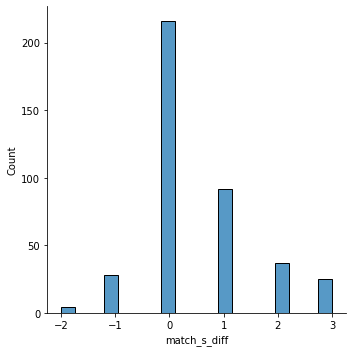

In [225]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,33
1,0.0,257
2,1.0,90
3,2.0,11
4,3.0,10


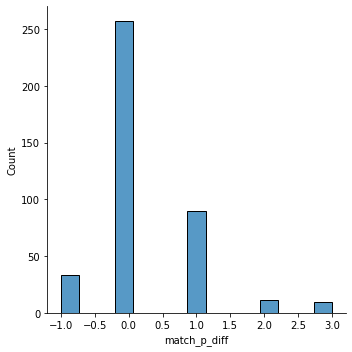

In [226]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

In [227]:
# temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
# display(temp)
# display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [228]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
# print('Noisy: ')
# print('Matches:',df_sample['match_n'].sum())
# print('Total:',df_sample['match_n'].count())
# print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 106
Total: 201
Segment IOE: 52.736318407960205 

Parent: 
Matches: 131
Total: 201
Parent IOE: 65.17412935323384 



#### <b>Cohen's Kappa<b>

In [229]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
#print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.3003069321754753


# IOE on Cleaned Data
## Full Dataset

In [9]:
file_path='./CleanData/ValDrop/'

In [10]:
# Read Data
anno_train = pd.read_csv(file_path+'full_train.csv')
anno_val = pd.read_csv(file_path+'full_val.csv')

In [11]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,extra_sounds_train,parent_label_train,segment_label_train,noisy_train,Notes_train
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3,9999,"clapping, coughing",0,0,1,Only laughing


Index(['file_name', 'parent_file_train', 'number_of_segments_train',
       'number_of_voices_parent_train', 'extra_sounds_train',
       'parent_label_train', 'segment_label_train', 'noisy_train',
       'Notes_train'],
      dtype='object')


In [12]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,noisy_val,extra_sounds_val,Notes_val
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,NaN,0,0.0,1.0,NaN,NaN


Index(['file_name', 'parent_file_val', 'number_of_segments_val',
       'number_of_voices_parent_val', 'segment_label_val', 'parent_label_val',
       'noisy_val', 'extra_sounds_val', 'Notes_val'],
      dtype='object')


In [13]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   file_name                      2148 non-null   object
 1   parent_file_train              2148 non-null   object
 2   number_of_segments_train       2148 non-null   int64 
 3   number_of_voices_parent_train  2148 non-null   int64 
 4   extra_sounds_train             1093 non-null   object
 5   parent_label_train             2148 non-null   int64 
 6   segment_label_train            2148 non-null   int64 
 7   noisy_train                    2148 non-null   int64 
 8   Notes_train                    795 non-null    object
dtypes: int64(5), object(4)
memory usage: 151.2+ KB


In [14]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    2148 non-null   object 
 1   parent_file_val              2148 non-null   object 
 2   number_of_segments_val       1813 non-null   float64
 3   number_of_voices_parent_val  1008 non-null   float64
 4   segment_label_val            2148 non-null   int64  
 5   parent_label_val             2147 non-null   float64
 6   noisy_val                    1871 non-null   float64
 7   extra_sounds_val             381 non-null    object 
 8   Notes_val                    5 non-null      object 
dtypes: float64(4), int64(1), object(4)
memory usage: 151.2+ KB


In [15]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [16]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name')#,how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,extra_sounds_train,parent_label_train,segment_label_train,noisy_train,Notes_train,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,noisy_val,extra_sounds_val,Notes_val
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3,9999,"clapping, coughing",0,0,1,Only laughing,00g8dfgpqpt61,3.0,NaN,0,0.0,1.0,NaN,NaN
1,00g8dfgpqpt61_processed_1,00g8dfgpqpt62,3,9999,clapping,0,0,1,Only laughing,00g8dfgpqpt61,3.0,NaN,0,0.0,1.0,NaN,NaN
2,00g8dfgpqpt61_processed_2,00g8dfgpqpt63,3,9999,NaN,0,0,1,Only laughing,00g8dfgpqpt61,3.0,NaN,0,0.0,1.0,NaN,NaN
3,01avx2fm1t961_processed_0,01avx2fm1t961,5,9999,baby crying,3,3,1,NaN,01avx2fm1t961,5.0,NaN,3,3.0,1.0,NaN,NaN
4,01avx2fm1t961_processed_1,01avx2fm1t961,5,9999,baby crying,3,2,1,NaN,01avx2fm1t961,5.0,NaN,3,3.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,xdz15thrnem51_processed_8,xdz15thrnem51,14,7,cops,2,2,0,NaN,xdz15thrnem51,14.0,3.0,3,3.0,NaN,NaN,NaN
2146,xdz15thrnem51_processed_9,xdz15thrnem51,14,7,NaN,2,1,0,NaN,xdz15thrnem51,14.0,3.0,2,3.0,NaN,NaN,NaN
2147,xdz15thrnem51_processed_11,xdz15thrnem51,14,7,cops,2,2,0,NaN,xdz15thrnem51,14.0,3.0,3,3.0,NaN,NaN,NaN
2148,xdz15thrnem51_processed_12,xdz15thrnem51,14,7,cops,2,1,0,NaN,xdz15thrnem51,14.0,3.0,2,3.0,NaN,NaN,NaN


In [17]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged['segment_label_train'].isna() | df_merged['segment_label_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2149
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      2150 non-null   object 
 1   parent_file_train              2150 non-null   object 
 2   number_of_segments_train       2150 non-null   int64  
 3   number_of_voices_parent_train  2150 non-null   int64  
 4   extra_sounds_train             1093 non-null   object 
 5   parent_label_train             2150 non-null   int64  
 6   segment_label_train            2150 non-null   int64  
 7   noisy_train                    2150 non-null   int64  
 8   Notes_train                    795 non-null    object 
 9   parent_file_val                2150 non-null   object 
 10  number_of_segments_val         1813 non-null   float64
 11  number_of_voices_parent_val    1008 non-null   float64
 12  segment_label_val              2150 non-null   i

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [25]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 1290
Total: 2150
Segment Unweighted IOE: 60.0
Segment Weighted IOE (Mean Absolute Error): 0.4 

Parent: 
Matches: 1140
Total: 2150
Parent IOE: 53.02325581395348
Parent Weighted IOE (Mean Absolute Error): 0.4695207073057236 

Noisy: 
Matches: 1581
Total: 2150
Noisy IOE: 73.53488372093024


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1,451
1,0,1290
2,1,409


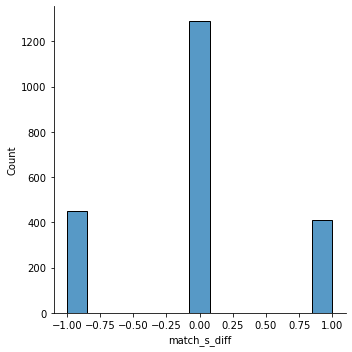

In [26]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,418
1,0.0,1140
2,1.0,591


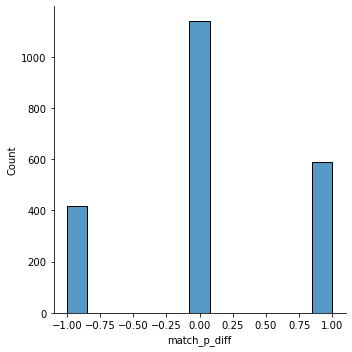

In [27]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-3.0,1
1,-1.0,210
2,0.0,1581
3,1.0,81


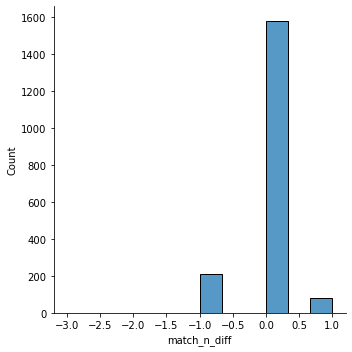

In [28]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [29]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 629
Total: 1075
Segment IOE: 58.51162790697675 

Parent: 
Matches: 561
Total: 1075
Parent IOE: 52.18604651162791 

Noisy: 
Matches: 796
Total: 1075
Noisy IOE: 74.04651162790698


#### <b>Cohen's Kappa<b>

In [33]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
#print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.4193162000730487


#### <b>Label Variances <b>

In [22]:
df_var = df_merged.groupby(['segment_label_train','segment_label_val'])['file_name'].count().reset_index().rename(columns={'file_name':'%age'})
df_var['%age'] = df_var['%age']/df_var['%age'].sum()*100
df_var=df_var[df_var['segment_label_train']!=df_var['segment_label_val']]
df_var

,segment_label_train,segment_label_val,%age
1,0,1,11.441860
2,1,0,7.395349
4,1,2,6.558140
5,2,1,7.116279
7,2,3,2.930233
8,3,2,4.511628
10,3,4,0.046512


In [23]:
df_var = df_merged.groupby(['parent_label_train','parent_label_val'])['file_name'].count().reset_index().rename(columns={'file_name':'%age'})
df_var['%age'] = df_var['%age']/df_var['%age'].sum()*100
df_var=df_var[df_var['parent_label_train']!=df_var['parent_label_val']]
df_var

,parent_label_train,parent_label_val,%age
1,0,1.0,6.514658
2,1,0.0,6.421591
4,1,2.0,7.957189
5,2,1.0,9.585854
7,2,3.0,4.094928
8,3,2.0,11.493718
10,3,4.0,0.884132


## A

In [265]:
# Read Data
anno_train = pd.read_csv(file_path+'A-cleaned.csv')
anno_val = pd.read_csv(file_path+'A-cleaned-val.csv')

In [266]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,extra_sounds_train,parent_label_train,segment_label_train,noisy_train,Notes_train
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing


Index(['file_name', 'parent_file_train', 'number_of_segments_train',
       'number_of_voices_parent_train', 'extra_sounds_train',
       'parent_label_train', 'segment_label_train', 'noisy_train',
       'Notes_train'],
      dtype='object')


In [267]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,noisy,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,Noisy,extra_sounds_val,Notes_val
0,00g8dfgpqpt61_processed_0,1.0,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN


Index(['file_name', 'noisy', 'parent_file_val', 'number_of_segments_val',
       'number_of_voices_parent_val', 'segment_label_val', 'parent_label_val',
       'Noisy', 'extra_sounds_val', 'Notes_val'],
      dtype='object')


In [268]:
# # Correct val file column names
# # Run for: A-CW
# anno_val.columns=['parent_file','file_name', 'number_of_segments',
#        'number_of_voices_in_parent', 'segment_label', 'parent_label', 'noisy',
#        'extra sounds', 'Notes']
# anno_val.head(1)

In [269]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      805 non-null    object 
 1   parent_file_train              805 non-null    object 
 2   number_of_segments_train       805 non-null    float64
 3   number_of_voices_parent_train  805 non-null    float64
 4   extra_sounds_train             351 non-null    object 
 5   parent_label_train             805 non-null    float64
 6   segment_label_train            805 non-null    float64
 7   noisy_train                    805 non-null    float64
 8   Notes_train                    11 non-null     object 
dtypes: float64(5), object(4)
memory usage: 56.7+ KB


In [270]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    805 non-null    object 
 1   noisy                        805 non-null    float64
 2   parent_file_val              805 non-null    object 
 3   number_of_segments_val       805 non-null    float64
 4   number_of_voices_parent_val  0 non-null      float64
 5   segment_label_val            805 non-null    float64
 6   parent_label_val             805 non-null    float64
 7   Noisy                        805 non-null    float64
 8   extra_sounds_val             39 non-null     object 
 9   Notes_val                    0 non-null      float64
dtypes: float64(7), object(3)
memory usage: 63.0+ KB


In [271]:
# segment_label = 'segment_label'
# parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [272]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name')#,how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,extra_sounds_train,parent_label_train,segment_label_train,noisy_train,Notes_train,noisy,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,Noisy,extra_sounds_val,Notes_val
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing,1.0,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
1,00g8dfgpqpt61_processed_1,00g8dfgpqpt62,3.0,9999.0,clapping,0.0,0.0,1.0,Only laughing,1.0,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
2,00g8dfgpqpt61_processed_2,00g8dfgpqpt63,3.0,9999.0,NaN,0.0,0.0,1.0,Only laughing,1.0,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
3,01avx2fm1t961_processed_0,01avx2fm1t961,5.0,9999.0,baby crying,3.0,3.0,1.0,NaN,1.0,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
4,01avx2fm1t961_processed_1,01avx2fm1t961,5.0,9999.0,baby crying,3.0,2.0,1.0,NaN,1.0,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,zvkhxd3vp3o51_processed_1,zvkhxd3vp3o51,9.0,2.0,crowd,2.0,2.0,0.0,NaN,0.0,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN
801,zvkhxd3vp3o51_processed_4,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,0.0,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN
802,zvkhxd3vp3o51_processed_5,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,0.0,zvkhxd3vp3o51,9.0,NaN,2.0,3.0,1.0,NaN,NaN
803,zvkhxd3vp3o51_processed_6,zvkhxd3vp3o51,9.0,3.0,"crowd, kids screaming",2.0,2.0,0.0,NaN,0.0,zvkhxd3vp3o51,9.0,NaN,3.0,3.0,1.0,NaN,NaN


In [273]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged['segment_label_train'].isna() | df_merged['segment_label_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      805 non-null    object 
 1   parent_file_train              805 non-null    object 
 2   number_of_segments_train       805 non-null    float64
 3   number_of_voices_parent_train  805 non-null    float64
 4   extra_sounds_train             351 non-null    object 
 5   parent_label_train             805 non-null    float64
 6   segment_label_train            805 non-null    float64
 7   noisy_train                    805 non-null    float64
 8   Notes_train                    11 non-null     object 
 9   noisy                          805 non-null    float64
 10  parent_file_val                805 non-null    object 
 11  number_of_segments_val         805 non-null    float64
 12  number_of_voices_parent_val    0 non-null      flo

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [276]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['Noisy'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['Noisy'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 505
Total: 805
Segment Unweighted IOE: 62.732919254658384
Segment Weighted IOE (Mean Absolute Error): 0.37267080745341613 

Parent: 
Matches: 511
Total: 805
Parent IOE: 63.47826086956522
Parent Weighted IOE (Mean Absolute Error): 0.3652173913043478 

Noisy: 
Matches: 641
Total: 805
Noisy IOE: 79.62732919254658


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,180
1,0.0,505
2,1.0,120


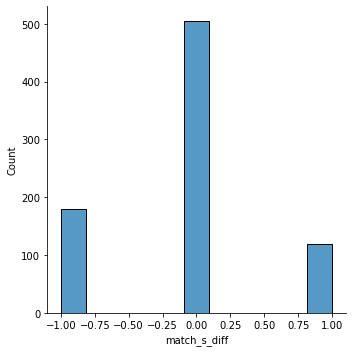

In [277]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,231
1,0.0,511
2,1.0,63


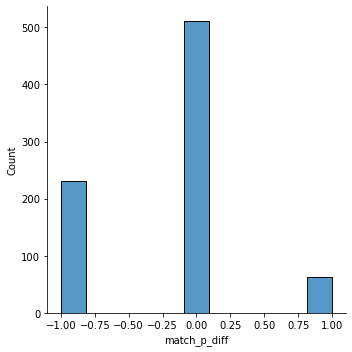

In [278]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-1.0,140
1,0.0,641
2,1.0,24


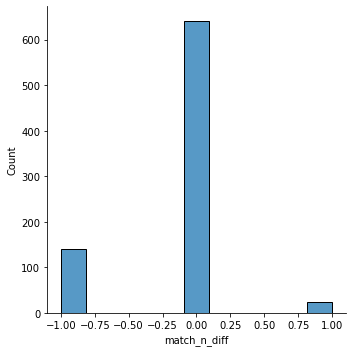

In [279]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [280]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 257
Total: 402
Segment IOE: 63.93034825870647 

Parent: 
Matches: 250
Total: 402
Parent IOE: 62.189054726368155 

Noisy: 
Matches: 324
Total: 402
Noisy IOE: 80.59701492537313


#### <b>Cohen's Kappa<b>

In [282]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['Noisy']))

Cohen k (Segment): 0.43361976772547317
Cohen k (Parent): 0.5128412550404782
Cohen k (Noisy): 0.35359094381010203


## E

In [155]:
# # Read Data
# anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-VP.xlsx')
# anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-PK.xlsx')

In [284]:
# Read Data
anno_train = pd.read_csv(file_path+'E-cleaned.csv')
anno_val = pd.read_csv(file_path+'E-cleaned-val.csv')

In [285]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,segment_label_train,extra_sounds_train,parent_label_train,notes_train,noisy_train
0,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3.0,1.0,0.0,Clicking,0.0,"The man uses suggestive language, but there is...",0.0


Index(['file_name', 'parent_file_train', 'number_of_segments_train',
       'number_of_voices_parent_train', 'segment_label_train',
       'extra_sounds_train', 'parent_label_train', 'notes_train',
       'noisy_train'],
      dtype='object')


In [286]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file_val,number_of_segments_val,noisy_val,number_of_voices_parent_val,extra_sounds_val,parent_label_val,segment_label_val,notes_val
0,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN


Index(['file_name', 'parent_file_val', 'number_of_segments_val', 'noisy_val',
       'number_of_voices_parent_val', 'extra_sounds_val', 'parent_label_val',
       'segment_label_val', 'notes_val'],
      dtype='object')


In [287]:
# # Correct val file column names
# # Run for: E-VP
# anno_train.columns=['File Name', 'Parent file', 'Number of Segments',
#        'Number of voices parent', 'Segment label', 'extra sounds',
#        'Parent label', 'Notes', 'Noisy']
# anno_train.head(1)

In [288]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      731 non-null    object 
 1   parent_file_train              731 non-null    object 
 2   number_of_segments_train       731 non-null    float64
 3   number_of_voices_parent_train  731 non-null    float64
 4   segment_label_train            731 non-null    float64
 5   extra_sounds_train             548 non-null    object 
 6   parent_label_train             731 non-null    float64
 7   notes_train                    731 non-null    object 
 8   noisy_train                    731 non-null    float64
dtypes: float64(5), object(4)
memory usage: 51.5+ KB


In [289]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    731 non-null    object 
 1   parent_file_val              731 non-null    object 
 2   number_of_segments_val       731 non-null    float64
 3   noisy_val                    731 non-null    float64
 4   number_of_voices_parent_val  731 non-null    float64
 5   extra_sounds_val             342 non-null    object 
 6   parent_label_val             731 non-null    float64
 7   segment_label_val            731 non-null    float64
 8   notes_val                    4 non-null      object 
dtypes: float64(5), object(4)
memory usage: 51.5+ KB


In [291]:
# segment_label = 'Segment label'
# parent_label = 'Parent label'
# file_name= 'File Name'

anno_train[file_name] = anno_train['file_name'].str.strip()
anno_val[file_name] = anno_val['file_name'].str.strip()

In [292]:
# join 
df_merged = pd.merge(anno_train,anno_val,on=file_name)#,how='left',suffixes=('_train', '_val'))
df_merged

,file_name_x,parent_file_train,number_of_segments_train,number_of_voices_parent_train,segment_label_train,extra_sounds_train,parent_label_train,notes_train,noisy_train,File Name,file_name_y,parent_file_val,number_of_segments_val,noisy_val,number_of_voices_parent_val,extra_sounds_val,parent_label_val,segment_label_val,notes_val
0,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3.0,1.0,0.0,Clicking,0.0,"The man uses suggestive language, but there is...",0.0,hqztlcsmm1k51_processed_0,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
1,hqztlcsmm1k51_processed_1,hqztlcsmm1k51,3.0,1.0,0.0,Clicking,0.0,There is no aggression heard in the audio file,0.0,hqztlcsmm1k51_processed_1,hqztlcsmm1k51_processed_1,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
2,hqztlcsmm1k51_processed_2,hqztlcsmm1k51,3.0,1.0,0.0,NaN,0.0,There is no aggression heard in the audio file,0.0,hqztlcsmm1k51_processed_2,hqztlcsmm1k51_processed_2,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
3,hr8n7irrnqk51_processed_0,hr8n7irrnqk51,11.0,2.0,0.0,NaN,1.0,There is no aggression heard in the audio file,0.0,hr8n7irrnqk51_processed_0,hr8n7irrnqk51_processed_0,hr8n7irrnqk51,11.0,0.0,2.0,NaN,0.0,0.0,NaN
4,hr8n7irrnqk51_processed_1,hr8n7irrnqk51,11.0,2.0,0.0,NaN,1.0,There is no aggression heard in the audio file,0.0,hr8n7irrnqk51_processed_1,hr8n7irrnqk51_processed_1,hr8n7irrnqk51,11.0,0.0,1.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,lng2m9l4j2w61_processed_1,lng2m9l4j2w61,6.0,2.0,0.0,NaN,0.0,There is no aggression heard in the audio file,0.0,lng2m9l4j2w61_processed_1,lng2m9l4j2w61_processed_1,lng2m9l4j2w61,6.0,0.0,1.0,NaN,0.0,0.0,NaN
727,lng2m9l4j2w61_processed_2,lng2m9l4j2w61,6.0,2.0,0.0,NaN,0.0,There is no aggression heard in the audio file,0.0,lng2m9l4j2w61_processed_2,lng2m9l4j2w61_processed_2,lng2m9l4j2w61,6.0,0.0,2.0,NaN,0.0,0.0,NaN
728,lng2m9l4j2w61_processed_3,lng2m9l4j2w61,6.0,2.0,0.0,NaN,0.0,There is no aggression heard in the audio file,0.0,lng2m9l4j2w61_processed_3,lng2m9l4j2w61_processed_3,lng2m9l4j2w61,6.0,0.0,2.0,NaN,0.0,0.0,NaN
729,lng2m9l4j2w61_processed_4,lng2m9l4j2w61,6.0,2.0,0.0,NaN,0.0,There is no aggression heard in the audio file,0.0,lng2m9l4j2w61_processed_4,lng2m9l4j2w61_processed_4,lng2m9l4j2w61,6.0,0.0,2.0,NaN,0.0,0.0,NaN


In [293]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name_x                    731 non-null    object 
 1   parent_file_train              731 non-null    object 
 2   number_of_segments_train       731 non-null    float64
 3   number_of_voices_parent_train  731 non-null    float64
 4   segment_label_train            731 non-null    float64
 5   extra_sounds_train             548 non-null    object 
 6   parent_label_train             731 non-null    float64
 7   notes_train                    731 non-null    object 
 8   noisy_train                    731 non-null    float64
 9   File Name                      731 non-null    object 
 10  file_name_y                    731 non-null    object 
 11  parent_file_val                731 non-null    object 
 12  number_of_segments_val         731 non-null    flo

#### <b> Match or No Match & Weighted Match<b>
#### 100%

In [296]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)
#print('Noisy Weighted IOE (Mean Absolute Error):', df_merged['match_n_diff_abs'].mean(),'\n')

100%
Segment: 
Matches: 442
Total: 731
Segment Unweighted IOE: 60.46511627906976
Segment Weighted IOE (Mean Absolute Error): 0.3953488372093023 

Parent: 
Matches: 280
Total: 731
Parent IOE: 38.303693570451436
Parent Weighted IOE (Mean Absolute Error): 0.6169630642954856 

Noisy: 
Matches: 674
Total: 731
Noisy IOE: 92.20246238030096


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,68
1,0.0,442
2,1.0,221


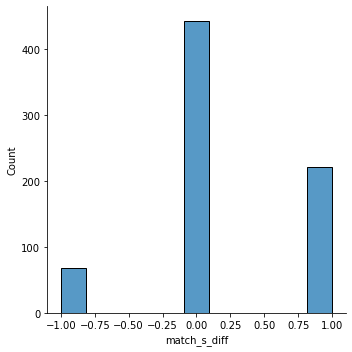

In [297]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,0.0,280
1,1.0,451


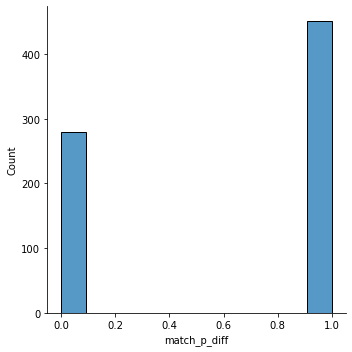

In [298]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-3.0,1
1,-1.0,19
2,0.0,674
3,1.0,37


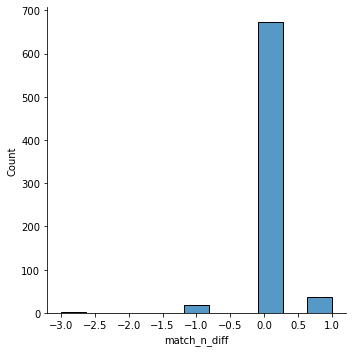

In [299]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [300]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 209
Total: 366
Segment IOE: 57.103825136612016 

Parent: 
Matches: 132
Total: 366
Parent IOE: 36.0655737704918 

Noisy: 
Matches: 339
Total: 366
Noisy IOE: 92.62295081967213


#### <b>Cohen's Kappa<b>

In [302]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.443664364171668
Cohen k (Parent): 0.19112963771707292
Cohen k (Noisy): 0.6072966834114022


## H

In [303]:
# # Read Data
# anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-TL_updated.xlsx')
# anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-KK_SA.xlsx')

In [304]:
# Read Data
anno_train = pd.read_csv(file_path+'H-cleaned.csv')
anno_val = pd.read_csv(file_path+'H-cleaned-val.csv')

In [305]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,noisy_train,extra_sounds_train,parent_label_train,segment_label_train,notes_train
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN


Index(['file_name', 'parent_file_train', 'number_of_segments_train',
       'number_of_voices_parent_train', 'noisy_train', 'extra_sounds_train',
       'parent_label_train', 'segment_label_train', 'notes_train'],
      dtype='object')


In [306]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file_val,number_of_segments_val,number_of_voices_parent_val,noisy_val,extra_sounds_val,parent_label_val,segment_label_val,notes_val
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN


Index(['file_name', 'parent_file_val', 'number_of_segments_val',
       'number_of_voices_parent_val', 'noisy_val', 'extra_sounds_val',
       'parent_label_val', 'segment_label_val', 'notes_val'],
      dtype='object')


In [307]:
# # Correct train file column names
# # Run for H-TL
# anno_train.columns=['file_name', 'parent_file', 'number_of_segments',
#        'number_of_voices_parent_file', 'noisy', 'extra sounds', 'parent_label',
#        'segment_label', 'Notes']

In [308]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      277 non-null    object 
 1   parent_file_train              277 non-null    object 
 2   number_of_segments_train       277 non-null    int64  
 3   number_of_voices_parent_train  277 non-null    int64  
 4   noisy_train                    277 non-null    float64
 5   extra_sounds_train             30 non-null     object 
 6   parent_label_train             277 non-null    float64
 7   segment_label_train            277 non-null    int64  
 8   notes_train                    20 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 19.6+ KB


In [309]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    277 non-null    object 
 1   parent_file_val              277 non-null    object 
 2   number_of_segments_val       277 non-null    float64
 3   number_of_voices_parent_val  277 non-null    float64
 4   noisy_val                    0 non-null      float64
 5   extra_sounds_val             31 non-null     object 
 6   parent_label_val             277 non-null    float64
 7   segment_label_val            277 non-null    float64
 8   notes_val                    5 non-null      object 
dtypes: float64(5), object(4)
memory usage: 19.6+ KB


In [310]:
# segment_label = 'segment_label'
# parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [311]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name')#,how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,noisy_train,extra_sounds_train,parent_label_train,segment_label_train,notes_train,parent_file_val,number_of_segments_val,number_of_voices_parent_val,noisy_val,extra_sounds_val,parent_label_val,segment_label_val,notes_val
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN
1,uortapdfw0x51_processed_1,uortapdfw0x51,8,4,0.0,NaN,3.0,0,woman2 is crying,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,1.0,NaN
2,uortapdfw0x51_processed_2,uortapdfw0x51,8,4,0.0,someone walking,3.0,0,no talking here,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN
3,uortapdfw0x51_processed_3,uortapdfw0x51,8,4,0.0,NaN,3.0,0,no talking here,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN
4,uortapdfw0x51_processed_4,uortapdfw0x51,8,4,0.0,NaN,3.0,3,NaN,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,xdz15thrnem51_processed_8,xdz15thrnem51,14,7,0.0,cops,2.0,2,NaN,xdz15thrnem51,14.0,3.0,NaN,NaN,3.0,3.0,unknown language
273,xdz15thrnem51_processed_9,xdz15thrnem51,14,7,0.0,NaN,2.0,1,NaN,xdz15thrnem51,14.0,3.0,NaN,NaN,3.0,2.0,unknown language
274,xdz15thrnem51_processed_11,xdz15thrnem51,14,7,0.0,cops,2.0,2,NaN,xdz15thrnem51,14.0,3.0,NaN,NaN,3.0,3.0,NaN
275,xdz15thrnem51_processed_12,xdz15thrnem51,14,7,0.0,cops,2.0,1,NaN,xdz15thrnem51,14.0,3.0,NaN,NaN,3.0,2.0,NaN


In [312]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 276
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      277 non-null    object 
 1   parent_file_train              277 non-null    object 
 2   number_of_segments_train       277 non-null    int64  
 3   number_of_voices_parent_train  277 non-null    int64  
 4   noisy_train                    277 non-null    float64
 5   extra_sounds_train             30 non-null     object 
 6   parent_label_train             277 non-null    float64
 7   segment_label_train            277 non-null    int64  
 8   notes_train                    20 non-null     object 
 9   parent_file_val                277 non-null    object 
 10  number_of_segments_val         277 non-null    float64
 11  number_of_voices_parent_val    277 non-null    float64
 12  noisy_val                      0 non-null      flo

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [313]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 128
Total: 277
Segment Unweighted IOE: 46.20938628158845
Segment Weighted IOE (Mean Absolute Error): 0.5379061371841155 

Parent: 
Matches: 122
Total: 277
Parent IOE: 44.04332129963899
Parent Weighted IOE (Mean Absolute Error): 0.5595667870036101 

Noisy: 
Matches: 0
Total: 277
Noisy IOE: 0.0


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,109
1,0.0,128
2,1.0,40


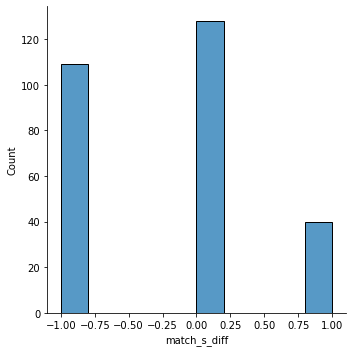

In [316]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,111
1,0.0,122
2,1.0,44


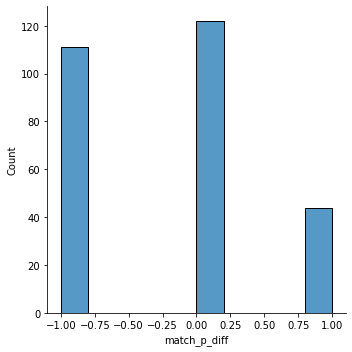

In [317]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n


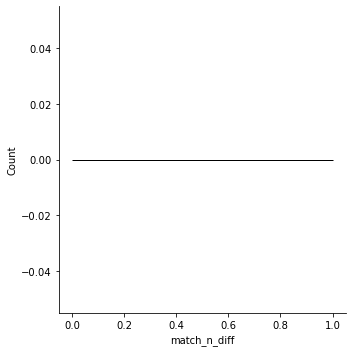

In [318]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [319]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 66
Total: 138
Segment IOE: 47.82608695652174 

Parent: 
Matches: 63
Total: 138
Parent IOE: 45.65217391304348 

Noisy: 
Matches: 0
Total: 138
Noisy IOE: 0.0


#### <b>Cohen's Kappa<b>

In [322]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
#print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['noisy'+'_val']))

Cohen k (Segment): 0.2365334813170551
Cohen k (Parent): 0.23828194301529293


## F

In [323]:
# # Read Data
# anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-F-CW.xlsx')
# anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-F-SA.xlsx')

In [324]:
# Read Data
anno_train = pd.read_csv(file_path+'F-cleaned.csv')
anno_val = pd.read_csv(file_path+'F-cleaned-val.csv')

In [325]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,parent_label_train,segment_label_train,noisy_train,extra_sounds_train,notes,Notes
0,lpg39tdh1bv51_processed_0,lpg39tdh1bv51,4,6.0,0.0,0.0,1.0,NaN,NaN,NaN


Index(['file_name', 'parent_file_train', 'number_of_segments_train',
       'number_of_voices_parent_train', 'parent_label_train',
       'segment_label_train', 'noisy_train', 'extra_sounds_train', 'notes',
       'Notes'],
      dtype='object')


In [326]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,noisy,extra_sounds,notes,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,Noisy,extra sounds,Notes
0,lpg39tdh1bv51_processed_0,1.0,NaN,NaN,lpg39tdh1bv51,NaN,NaN,0.0,0.0,1.0,NaN,NaN


Index(['file_name', 'noisy', 'extra_sounds', 'notes', 'parent_file_val',
       'number_of_segments_val', 'number_of_voices_parent_val',
       'segment_label_val', 'parent_label_val', 'Noisy', 'extra sounds',
       'Notes'],
      dtype='object')


In [327]:
# # Correct train file column names
# anno_train.columns=['parent_file', 'file_name', 'segment_label', 'parent_label', 'Noisy',
#        'extra sounds', 'Notes']

In [328]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      335 non-null    object 
 1   parent_file_train              335 non-null    object 
 2   number_of_segments_train       335 non-null    int64  
 3   number_of_voices_parent_train  335 non-null    float64
 4   parent_label_train             335 non-null    float64
 5   segment_label_train            335 non-null    float64
 6   noisy_train                    335 non-null    float64
 7   extra_sounds_train             164 non-null    object 
 8   notes                          33 non-null     object 
 9   Notes                          1 non-null      object 
dtypes: float64(4), int64(1), object(5)
memory usage: 26.3+ KB


In [329]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    335 non-null    object 
 1   noisy                        335 non-null    float64
 2   extra_sounds                 164 non-null    object 
 3   notes                        33 non-null     object 
 4   parent_file_val              335 non-null    object 
 5   number_of_segments_val       0 non-null      float64
 6   number_of_voices_parent_val  0 non-null      float64
 7   segment_label_val            335 non-null    float64
 8   parent_label_val             334 non-null    float64
 9   Noisy                        335 non-null    float64
 10  extra sounds                 0 non-null      float64
 11  Notes                        1 non-null      object 
dtypes: float64(7), object(5)
memory usage: 31.5+ KB


In [330]:
# segment_label = 'segment_label'
# parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [331]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name')#,how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_train,parent_label_train,segment_label_train,noisy_train,extra_sounds_train,notes_x,Notes_x,...,extra_sounds,notes_y,parent_file_val,number_of_segments_val,number_of_voices_parent_val,segment_label_val,parent_label_val,Noisy,extra sounds,Notes_y
0,lpg39tdh1bv51_processed_0,lpg39tdh1bv51,4,6.0,0.0,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,lpg39tdh1bv51,NaN,NaN,0.0,0.0,1.0,NaN,NaN
1,lpg39tdh1bv51_processed_1,lpg39tdh1bv51,4,6.0,0.0,0.0,1.0,NaN,excessive laughing,NaN,...,NaN,excessive laughing,lpg39tdh1bv51,NaN,NaN,0.0,0.0,1.0,NaN,NaN
2,lpg39tdh1bv51_processed_2,lpg39tdh1bv51,4,6.0,0.0,0.0,1.0,NaN,excessive laughing,NaN,...,NaN,excessive laughing,lpg39tdh1bv51,NaN,NaN,0.0,0.0,1.0,NaN,NaN
3,ltdu6anws3m61_processed_0,ltdu6anws3m61,4,2.0,1.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,ltdu6anws3m61,NaN,NaN,1.0,1.0,0.0,NaN,NaN
4,ltdu6anws3m61_processed_1,ltdu6anws3m61,4,2.0,1.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,ltdu6anws3m61,NaN,NaN,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,oc2jufewbdd61_processed_0,oc2jufewbdd61,4,2.0,1.0,1.0,0.0,"music, speech",NaN,NaN,...,"music, speech",NaN,oc2jufewbdd61,NaN,NaN,0.0,1.0,0.0,NaN,NaN
333,oc2jufewbdd61_processed_1,oc2jufewbdd61,4,2.0,1.0,1.0,0.0,"music, speech",NaN,NaN,...,"music, speech",NaN,oc2jufewbdd61,NaN,NaN,0.0,1.0,0.0,NaN,NaN
334,oc2jufewbdd61_processed_2,oc2jufewbdd61,4,2.0,1.0,0.0,0.0,"music, speech",NaN,NaN,...,"music, speech",NaN,oc2jufewbdd61,NaN,NaN,1.0,1.0,0.0,NaN,NaN
335,oc2jufewbdd61_processed_3,oc2jufewbdd61,4,2.0,1.0,0.0,0.0,"music, speech",NaN,NaN,...,"music, speech",NaN,oc2jufewbdd61,NaN,NaN,1.0,1.0,0.0,NaN,NaN


In [332]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged[segment_label+'_train'].isna() | df_merged[segment_label+'_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      337 non-null    object 
 1   parent_file_train              337 non-null    object 
 2   number_of_segments_train       337 non-null    int64  
 3   number_of_voices_parent_train  337 non-null    float64
 4   parent_label_train             337 non-null    float64
 5   segment_label_train            337 non-null    float64
 6   noisy_train                    337 non-null    float64
 7   extra_sounds_train             164 non-null    object 
 8   notes_x                        33 non-null     object 
 9   Notes_x                        1 non-null      object 
 10  noisy                          337 non-null    float64
 11  extra_sounds                   164 non-null    object 
 12  notes_y                        33 non-null     obj

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [333]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['Noisy'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['Noisy'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 215
Total: 337
Segment Unweighted IOE: 63.798219584569736
Segment Weighted IOE (Mean Absolute Error): 0.3620178041543027 

Parent: 
Matches: 227
Total: 337
Parent IOE: 67.35905044510386
Parent Weighted IOE (Mean Absolute Error): 0.3244047619047619 

Noisy: 
Matches: 266
Total: 337
Noisy IOE: 78.93175074183976


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-1.0,94
1,0.0,215
2,1.0,28


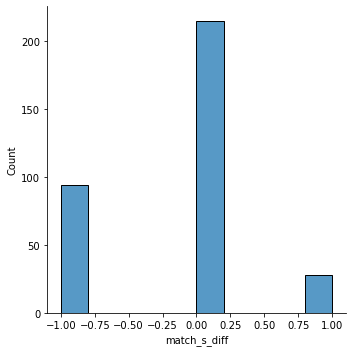

In [334]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-1.0,76
1,0.0,227
2,1.0,33


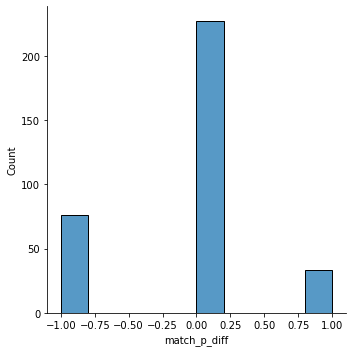

In [335]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

In [336]:
# temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
# display(temp)
# display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [337]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
# print('Noisy: ')
# print('Matches:',df_sample['match_n'].sum())
# print('Total:',df_sample['match_n'].count())
# print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 102
Total: 168
Segment IOE: 60.71428571428571 

Parent: 
Matches: 113
Total: 168
Parent IOE: 67.26190476190477 



#### <b>Cohen's Kappa<b>

In [339]:
# Calculate Cohen's k
print('Cohen k (Segment):',cohen_kappa_score(df_merged[segment_label+'_train'], df_merged[segment_label+'_val']))
# print('Cohen k (Parent):',cohen_kappa_score(df_merged[parent_label+'_train'], df_merged[parent_label+'_val']))
# print('Cohen k (Noisy):',cohen_kappa_score(df_merged['noisy'+'_train'], df_merged['Noisy']))

Cohen k (Segment): 0.4136539311741467
